In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

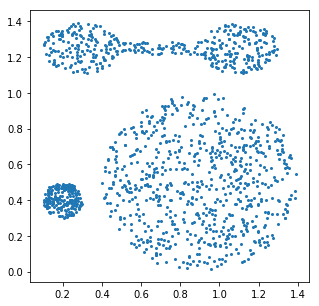

In [3]:
df = pd.read_csv('cluster2.csv')
X = df.values
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1], s=4)
plt.show()

In [4]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, random_state=0)

In [5]:
y_pred = k_means.fit_predict(X)
print(y_pred[:10])

[0 0 3 3 0 3 3 0 3 0]


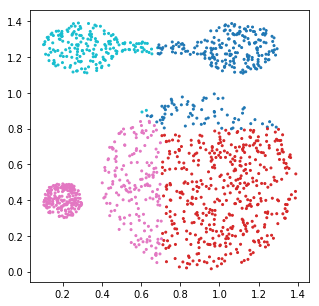

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=4, cmap='tab10')
plt.show()

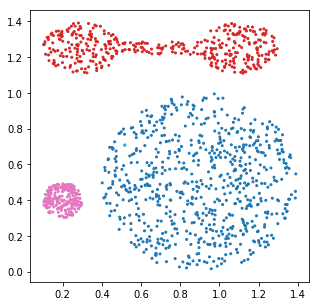

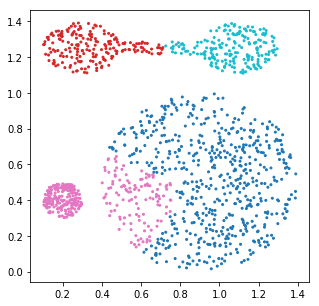

In [12]:
from sklearn.cluster import AgglomerativeClustering

for i, link in enumerate(('single', 'complete')):
    clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
    
    y_pred = clustering.fit_predict(X)
    plt.figure(i+1, figsize=(5,5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=4, cmap='tab10')
    
plt.show()

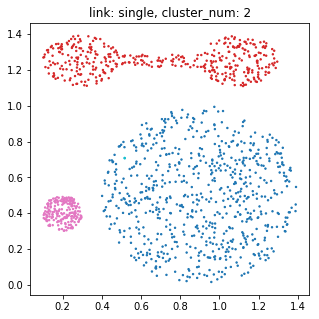

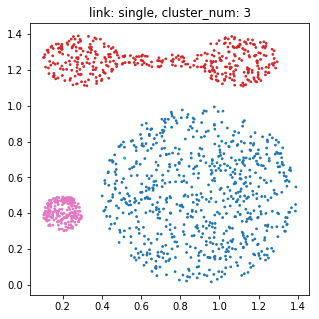

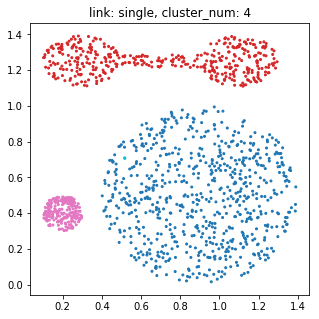

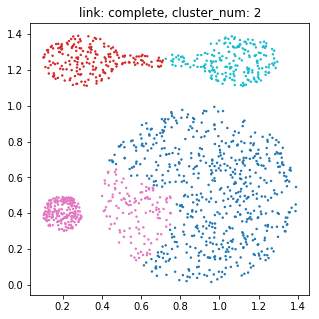

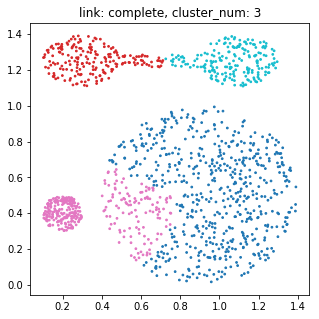

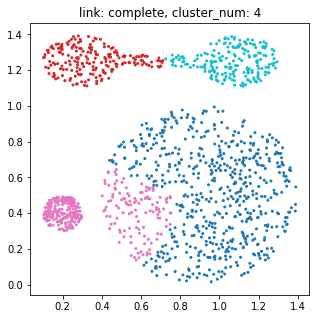

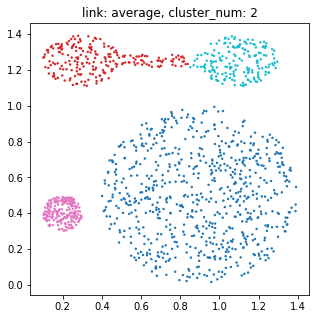

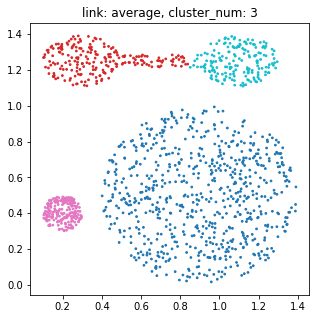

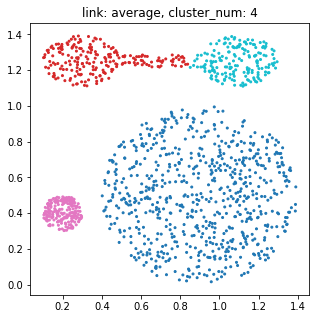

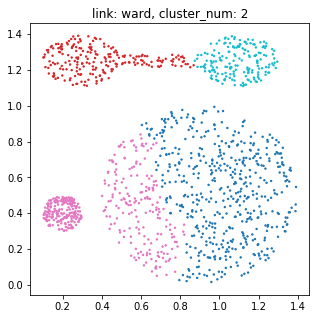

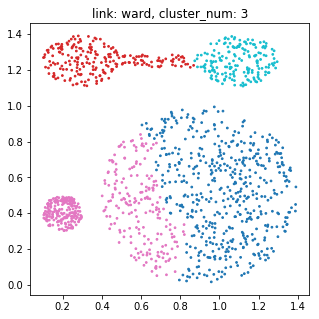

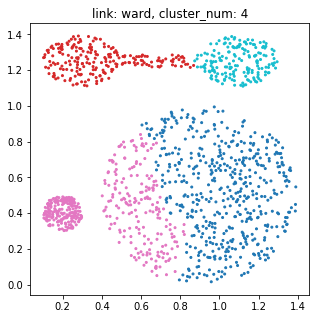

In [18]:
cnt = 1
for i, link in enumerate(('single', 'complete', 'average', 'ward')):
    for cluster_num in range(2, 5):
        clustering = AgglomerativeClustering(linkage=link, n_clusters=4)

        y_pred = clustering.fit_predict(X)
        plt.figure(cnt, figsize=(5,5))
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=cluster_num, cmap='tab10')
        plt.title(f'link: {link}, cluster_num: {cluster_num}')
        cnt += 1
    

plt.show()

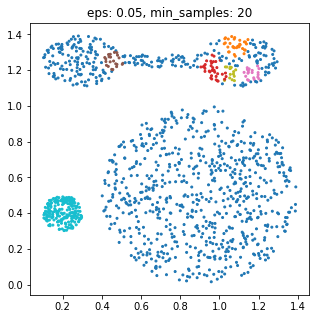

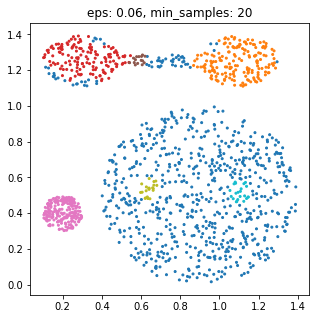

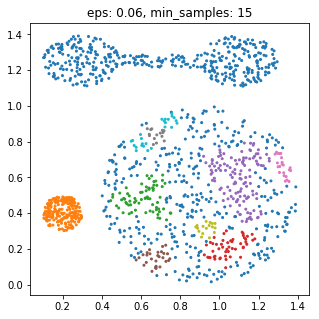

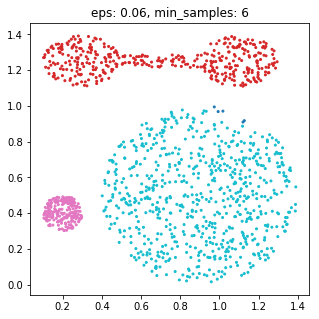

In [21]:
from sklearn.cluster import DBSCAN

for i, (eps, min_samples) in enumerate(((0.05, 20), (0.06, 20), (0.06, 15), (0.06, 6))):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    plt.figure(i+1, figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], cmap='tab10', s=4, c=y_pred)
    plt.title(f'eps: {eps}, min_samples: {min_samples}')
    
plt.show()

In [23]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=4, max_iter=20, random_state=0)

y_pred = em.fit_predict(X)
print(em.weights_)
print(em.covariances_)

[0.54305501 0.15217282 0.15989176 0.14488041]
[[[ 6.49289207e-02 -4.78095962e-04]
  [-4.78095962e-04  6.03293794e-02]]

 [[ 2.73531910e-03 -7.02052996e-05]
  [-7.02052996e-05  2.51901315e-03]]

 [[ 3.12803346e-02 -5.83851370e-04]
  [-5.83851370e-04  4.11677639e-03]]

 [[ 1.44971509e-02  4.61343042e-04]
  [ 4.61343042e-04  5.12229085e-03]]]
